# 基础实现

## 1. 交替合并字符串（1768）

`简单`

给你两个字符串 word1 和 word2 。请你从 word1 开始，通过交替添加字母来合并字符串。如果一个字符串比另一个字符串长，就将多出来的字母追加到合并后字符串的末尾。

返回 **合并后的字符串** 。

 

示例 1：
> 输入：`word1 = "abc", word2 = "pqr"`
>
> 输出：`"apbqcr"`
>
> 解释：字符串合并情况如下所示：
>
> word1：  a   b   c
>
> word2：  p   q   r
>
> 合并后：  a p b q c r

示例 2：

> 输入：word1 = "ab", word2 = "pqrs"
>
> 输出："apbqrs"
>
> 解释：注意，word2 比 word1 长，"rs" 需要追加到合并后字符串的末尾。
>
> word1：  a   b
>
> word2：    p   q   r   s
>
> 合并后：  a p b q   r   s

示例 3：

> 输入：word1 = "abcd", word2 = "pq"
>
> 输出："apbqcd"
>
> 解释：注意，word1 比 word2 长，"cd" 需要追加到合并后字符串的末尾。
>
> word1：  a   b   c   d
>
> word2：    p   q
>
> 合并后：  a p b q c   d

### 测试数据

In [2]:
word1 = "abcd"
word2 = "pqr"

### 代码

既然两个字符串长度不一定相同，那么直接截取较长的一段，再用一个指针遍历一次即可。

**注意：** 
1. Python 中的字符串（str）类型是可以直接遍历的（类似于List）。
2. Python 中的 `join` api，用于将序列中的元素以指定的字符连接生成一个新的**字符串**。

In [6]:
class Solution1:
    def mergeAlternately(self, word1: str, word2: str) -> str:
            resWord = []
            l1 = len(word1)
            l2 = len(word2)
            (shortLen, tailStr) = (l1, word2[l1:]) if l1 < l2 else (l2, word1[l2:])
            for index in range(shortLen):
                resWord.append(word1[index])
                resWord.append(word2[index])
            resWord.append(tailStr)
            return "".join(resWord)

solution1 = Solution1()
print(solution1.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


官方提出的方法是双指针：

该方法占用了更多内存，时间复杂度也没有降低。

In [7]:
class Solution2:
    def mergeAlternately(self, word1: str, word2: str) -> str:
        m, n = len(word1), len(word2)
        i = j = 0

        ans = list()
        while i < m or j < n:
            if i < m:
                ans.append(word1[i])
                i += 1
            if j < n:
                ans.append(word2[j])
                j += 1
        
        return "".join(ans)

solution2 = Solution2()
print(solution2.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


也可以不截取，而是通过 if 判断，这样更快：

In [9]:
class Solution3:
    def mergeAlternately(self, word1: str, word2: str) -> str:
        p1 = 0
        p2 = 0
        res = ""
        while p1!=len(word1) and p2!=len(word2):
            res+= word1[p1]
            p1+=1
            res+= word2[p2]
            p2+=1
        if p1!=len(word1):
            res+=word1[p1:]
        if p2!=len(word2):
            res += word2[p2:]
        return res

solution3 = Solution3()
print(solution3.mergeAlternately(word1, word2))    # 期望输出：apbqcrd

apbqcrd


## 2. 找不同（389）

给定两个字符串 s 和 t ，它们只包含小写字母。

字符串 t 由字符串 s 随机重排，然后在随机位置添加一个字母。

请找出在 t 中被添加的字母。

 

示例 1：

>输入：s = "abcd", t = "abcde"
>
>输出："e"
>
>解释：'e' 是那个被添加的字母。

示例 2：
>
> 输入：s = "", t = "y"
>
> 输出："y"

### 测试数据

In [10]:
s = "abcdd"
t = "abcddd"

### 代码
直接遍历一遍算ascii码就行了。
用到了 Python 的字符串 api：

1. `ord`：str to ascii
2. `chr`：ascii to str

In [11]:
class Solution1:
    def findTheDifference(self, s: str, t: str) -> str:
        sum_ascii_s = 0
        sum_ascii_t = 0
        for i in range(len(s)):
            sum_ascii_s += ord(s[i])
            sum_ascii_t += ord(t[i])
        sum_ascii_t += ord(t[-1])
        return chr(sum_ascii_t - sum_ascii_s)

solution1 = Solution1()
print(solution1.findTheDifference(s, t))

d


这里其实是使用了 hashTable ，只不过是 Python 内置了，不需要我们自己写。

只要涉及到“查询”并且不需要排序就可以考虑使用 HashTable，当然这里不合适，因为我们不关心其他的字母，只关心多出来的一个，可以实现一下就当复习了：

（这个方法在leetCode跑一遍好像还比ascii的方法更快一些）

In [12]:
class Solution2:
    def findTheDifference(self, s: str, t: str) -> str:
        hashTable = dict()
        raw_sum = 0
        index = 1
        for letter in s:
            if letter not in hashTable:
                hashTable[letter] = index
                hashTable[index] = letter
            raw_sum += hashTable[letter]
            index += 1
        sum = 0
        for letter in t:
            if letter in hashTable:
                sum += hashTable[letter]
            else:
                return letter
        return hashTable[sum - raw_sum]

solution2 = Solution2()
print(solution2.findTheDifference(s, t))

d


## 3. 找出字符串中第一个匹配项的下标（28）

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串的第一个匹配项的下标（下标从 0 开始）。如果 needle 不是 haystack 的一部分，则返回  -1 。

 

示例 1：

> 输入：haystack = "sadbutsad", needle = "sad"
>
> 输出：0
>
> 解释："sad" 在下标 0 和 6 处匹配。
>
> 第一个匹配项的下标是 0 ，所以返回 0 。

示例 2：

> 输入：haystack = "leetcode", needle = "leeto"
>
> 输出：-1
>
> 解释："leeto" 没有在 "leetcode" 中出现，所以返回 -1 。

### 测试数据

In [16]:
haystack1 = "leetcode"
needle1 = "leeto"

haystack2 = "leetcode"
needle2 = "et"

### 代码
一般的写法是循环一遍做字符串切片，依次比对：

In [17]:
class Solution1:
    def strStr(self, haystack: str, needle: str) -> int:
        n = len(needle)
        for i in range(len(haystack) - n + 1):
            if haystack[i:i+n] == needle:
                return i
        return -1

solution1 = Solution1()
print(solution1.strStr(haystack1, needle1))
print(solution1.strStr(haystack2, needle2))

-1
2


这种查找方法呆呆的，有更好的方法，比如： KMP，BM，Horspool，Sunday，写一个 Sunday 看看（参考于LeetCode）：

作者：Elastic Franklinod7

链接：[LeetCode](https://leetcode.cn/problems/find-the-index-of-the-first-occurrence-in-a-string/solutions/32675/python3-sundayjie-fa-9996-by-tes/)

In [18]:
class Solution2:
    def strStr(self, haystack: str, needle: str) -> int:
    
        # Func: 计算偏移表
        def calShiftMat(st):
            dic = {}
            for i in range(len(st)-1,-1,-1):
                if not dic.get(st[i]):
                    dic[st[i]] = len(st)-i
            dic["ot"] = len(st)+1
            return dic
        
        # 其他情况判断
        if len(needle) > len(haystack):return -1
        if needle=="": return 0
       
        # 偏移表预处理    
        dic = calShiftMat(needle)
        idx = 0
    
        while idx+len(needle) <= len(haystack):
            
            # 待匹配字符串
            str_cut = haystack[idx:idx+len(needle)]
            
            # 判断是否匹配
            if str_cut==needle:
                return idx
            else:
                # 边界处理
                if idx+len(needle) >= len(haystack):
                    return -1
                # 不匹配情况下，根据下一个字符的偏移，移动idx
                cur_c = haystack[idx+len(needle)]
                if dic.get(cur_c):
                    idx += dic[cur_c]
                else:
                    idx += dic["ot"]
            
        
        return -1 if idx+len(needle) >= len(haystack) else idx

solution2 = Solution2()
print(solution2.strStr(haystack1, needle1))
print(solution2.strStr(haystack2, needle2))

-1
2


## 4. 有效的字母异位词（242）

给定两个字符串 s 和 t ，编写一个函数来判断 t 是否是 s 的字母异位词。

注意：若 s 和 t 中每个字符出现的次数都相同，则称 s 和 t 互为字母异位词。

 

示例 1:

> 输入: s = "anagram", t = "nagaram"
>
> 输出: true

示例 2:

> 输入: s = "rat", t = "car"
>
> 输出: false 

进阶: 如果输入字符串包含 unicode 字符怎么办？你能否调整你的解法来应对这种情况

### 测试数据

In [21]:
s = "anagram"
t = "nagaram"

### 代码

哈希表，这里有一个巧妙的思路：加 1 减 1，这样就不需要建立两个表循环两次了。

并且 Python 中的 `Object` 内置了获取可迭代值的 api：

1. `Object.keys()`
2. `Object.values()`

In [25]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
        dic = dict()
        for c in s:
            if c not in dic:
                dic[c] = 0
            dic[c] += 1
        for c in t:
            if c not in dic:
                dic[c] = 0
            dic[c] -= 1
        for val in dic.values():
            if val != 0:
                return False
        return True

solution = Solution()
print(solution.isAnagram(s, t))

True


### 进阶

考虑使用 Python 内置的 Uncode 编码对应。

## 5. 重复的子字符串（459）

给定一个非空的字符串 s ，检查是否可以通过由它的一个子串重复多次构成。

示例 1:

> 输入: s = "abab"
>
> 输出: true
>
> 解释: 可由子串 "ab" 重复两次构成。
>
> 示例 2:

> 输入: s = "aba"
>
> 输出: false

示例 3:

> 输入: s = "abcabcabcabc"
>
> 输出: true
>
> 解释: 可由子串 "abc" 重复四次构成。 (或子串 "abcabc" 重复两次构成。)

### 测试数据

In [27]:
s1 = "abcabcabcabc"
s2 = "aba"

### 代码

最简单的思路就是把可能的子字符串一个一个列举出来判断，大多数人喜欢叫它“枚举”。

该方法里用到了 Python 内置的 api `all()`：表示全都 and 一遍。

In [32]:
class Solution1:
    def repeatedSubstringPattern(self, s: str) -> bool:
        n = len(s)
        for i in range(1, n // 2 + 1):
            if n % i == 0:
                if all(s[j] == s[j - i] for j in range(i, n)):
                    return True
        return False

solution1 = Solution1()
print(solution1.repeatedSubstringPattern(s1))
print(solution1.repeatedSubstringPattern(s2))

True
False


枚举肯定是最笨的，因为这个字符串如果是由重复的子字符串构成的，那么它就是有规律的。在处理没有规律的数据时，可以使用枚举，那么对于有规律的数据，要做的就是找规律，然后根据规律设计合适的算法。

下面的“字符串匹配”方法源于 [LeetCode](https://leetcode.cn/problems/repeated-substring-pattern/solutions/386481/zhong-fu-de-zi-zi-fu-chuan-by-leetcode-solution/)：

`str.find(str, beg=0, end=len(string))`
- str -- 指定检索的字符串
- beg -- 开始索引，默认为0。
- end -- 结束索引，默认为字符串的长度。

In [31]:
class Solution2:
    def repeatedSubstringPattern(self, s: str) -> bool:
        return (s + s).find(s, 1) != len(s)

solution2 = Solution2()
print(solution2.repeatedSubstringPattern(s1))
print(solution2.repeatedSubstringPattern(s2))

True
False


在方法二中，我们使用了 Python 自带的字符串查找函数 `find()`。同样我们也可以自己实现这个函数，例如使用比较经典的 KMP 算法。[LeetCode](https://leetcode.cn/problems/repeated-substring-pattern/solutions/386481/zhong-fu-de-zi-zi-fu-chuan-by-leetcode-solution/)

需要注意以下几点：

- KMP 算法虽然有着良好的理论时间复杂度上限，但大部分语言自带的字符串查找函数并不是用 KMP 算法实现的。这是因为在实现 API 时，我们需要在平均时间复杂度和最坏时间复杂度二者之间权衡。普通的暴力匹配算法以及优化的 BM 算法拥有比 KMP 算法更为优秀的平均时间复杂度；

- 学习 KMP 算法时，一定要理解其本质。如果放弃阅读晦涩难懂的材料（即使大部分讲解 KMP 算法的材料都包含大量的图，但图毕竟只能描述特殊而非一般情况）而是直接去阅读代码，是永远无法学会 KMP 算法的。读者甚至无法理解 KMP 算法关键代码中的任意一行。

由于本题就是在一个字符串中查询另一个字符串是否出现，可以直接套用 KMP 算法。因此这里对 KMP 算法本身不再赘述。读者可以自行查阅资料进行学习。这里留了三个思考题，读者可以在学习完毕后尝试回答这三个问题，检验自己的学习成果：

- 设查询串的的长度为 $n$，模式串的长度为 $m$，我们需要判断模式串是否为查询串的子串。那么使用 KMP 算法处理该问题时的时间复杂度是多少？在分析时间复杂度时使用了哪一种分析方法？

- 如果有多个查询串，平均长度为 $n$，数量为 $k$，那么总时间复杂度是多少？

- 在 KMP 算法中，对于模式串，我们需要预处理出一个 $\textit{fail}$ 数组（有时也称为 $\textit{next}$ 数组、$\pi$ 数组等）。这个数组到底表示了什么？

### KMP 算法

引用于：[如何更好地理解和掌握 KMP 算法? - 阮行止的回答 - 知乎](https://www.zhihu.com/question/21923021/answer/1032665486)

KMP算法是一种字符串匹配算法，可以在 O(n+m) 的时间复杂度内实现两个字符串的匹配。

暴力匹配算法，叫做 Brute Force （蛮力）算法：
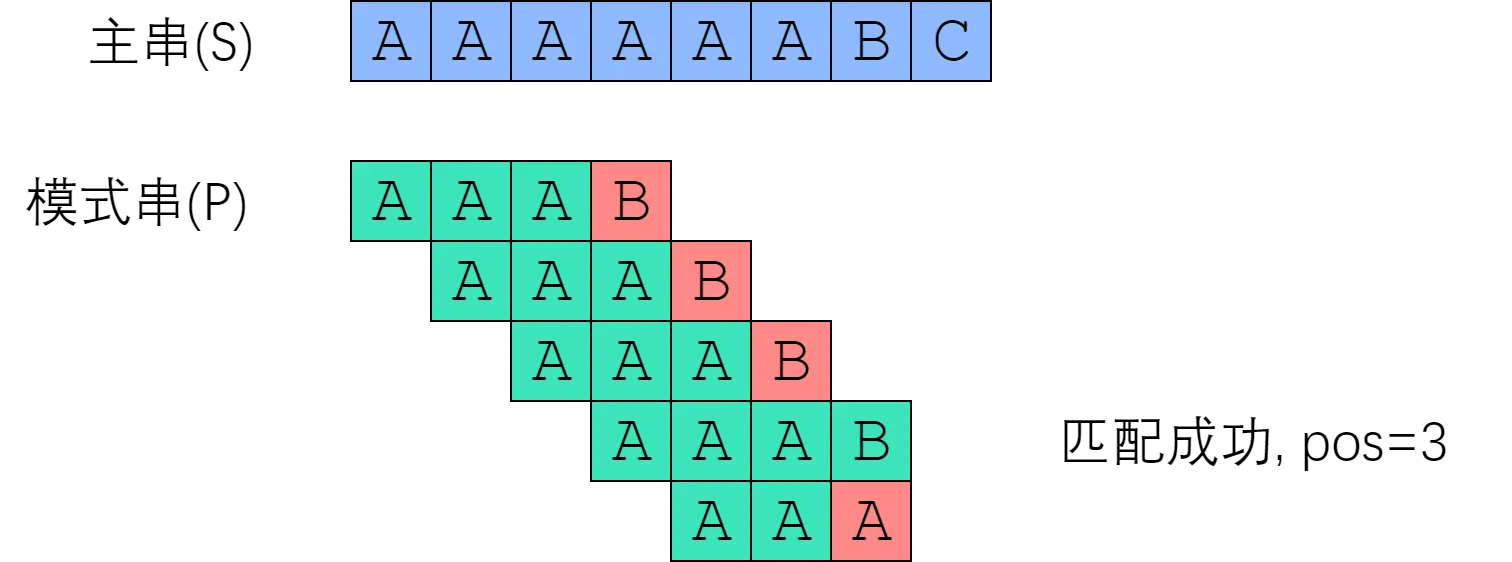

In [33]:
def bruteForce(S, Pattern):
    for i in range(len(S) - len(Pattern) + 1):
        if S[i : i+ len(Pattern)] == P:
            print(i)

我们成功实现了 Brute-Force 算法。现在，我们需要对它的时间复杂度做一点讨论。按照惯例，记 $n = |S|$ 为串 S 的长度，$m = |P|$ 为串 P 的长度。　　

考虑“字符串比较”这个小任务的复杂度。最坏情况发生在：两个字符串唯一的差别在最后一个字符。这种情况下，字符串比较必须走完整个字符串，才能给出结果，因此复杂度是 O(len) 的。　　　　

由此，不难想到 Brute-Force 算法所面对的最坏情况：主串形如“AAAAAAAAAAA...B”，而模式串形如“AAAAA...B”。每次字符串比较都需要付出 $|P|$ 次字符比较的代价，总共需要比较 $|S| - |P| + 1$ 次，因此总时间复杂度是  $O(|P|⋅(|S|−|P|+1))$ . 考虑到主串一般比模式串长很多，故 Brute-Force 的复杂度是 $O(|P|⋅|S|)$ ，也就是 $O(nm)$ 的。这太慢了！